    André Luiz da Silva Conde

    Processamento digital de imagens / Exercícios - Fundamentos Imagens

    - Operação por vizinhança

# 2.1. Calcular o filtro da média

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter
import cv2

paths = ['./lena_gray_512.tif', './cameraman.tif', './house.tif']
images = [Image.open(path) for path in paths]

kernel = 3

def process(img, cb: callable):
    inverted_img = cb(img.copy())

    plt.figure(figsize=(10, 10))

    plt1 = plt.subplot(1, 2, 1)
    plt1.imshow(img, cmap='gray')
    plt1.set_title('Original')

    plt2 = plt.subplot(1, 2, 2)
    plt2.imshow(inverted_img, cmap='gray')
    plt2.set_title('Modified')

def for_each_imgs(cb: callable):
    for img in images:
        process(img, cb)

## Usando numpy

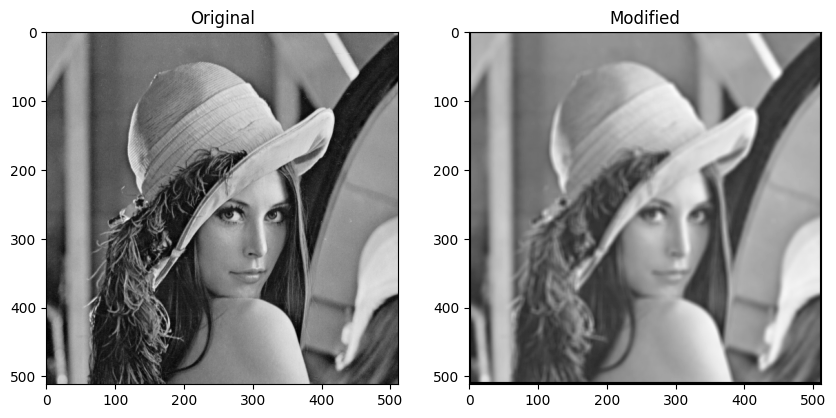

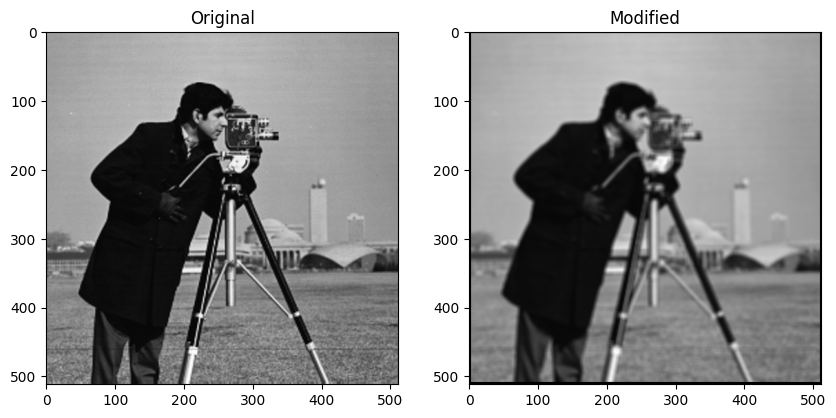

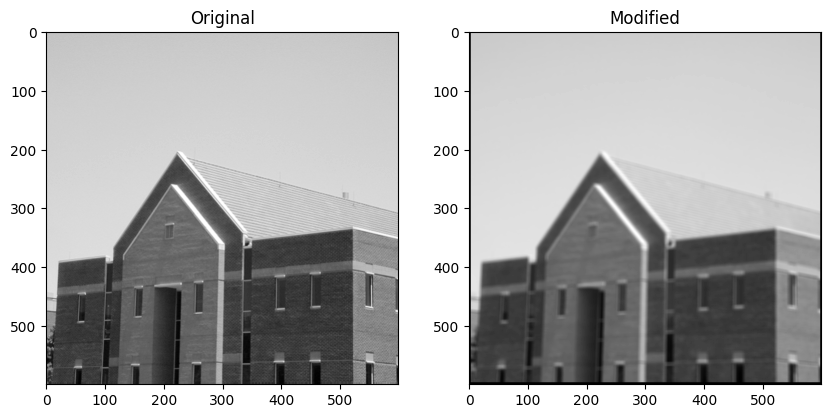

In [45]:
def mean_numpy(img) -> np.ndarray: 
    img_nd = np.array(img)
    lines = img_nd.shape[0]
    columns = img_nd.shape[1]

    image_nd = np.zeros((lines, columns), dtype=np.uint8)

    for x in range(kernel, lines - kernel):
        for y in range(kernel, columns - kernel):
            s_xy = img_nd[x - kernel: x + kernel + 1, y - kernel: y + kernel + 1]

            # get median
            mean = np.mean(s_xy).astype(int)

            # assign mean to output image
            image_nd[x, y] = mean

    return image_nd

for_each_imgs(mean_numpy)

## Usando pillow

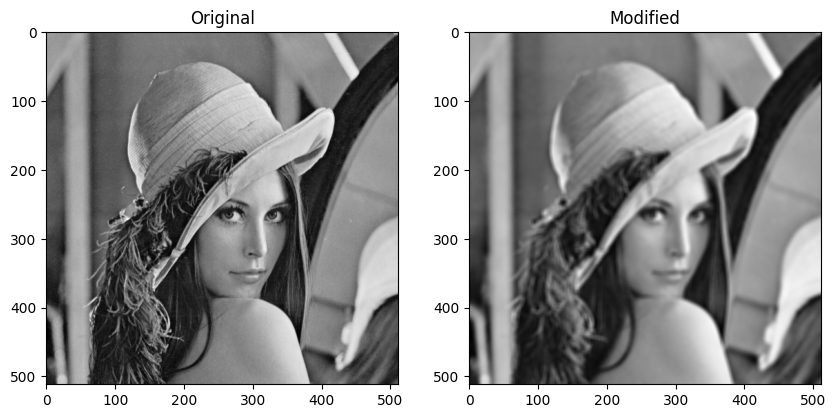

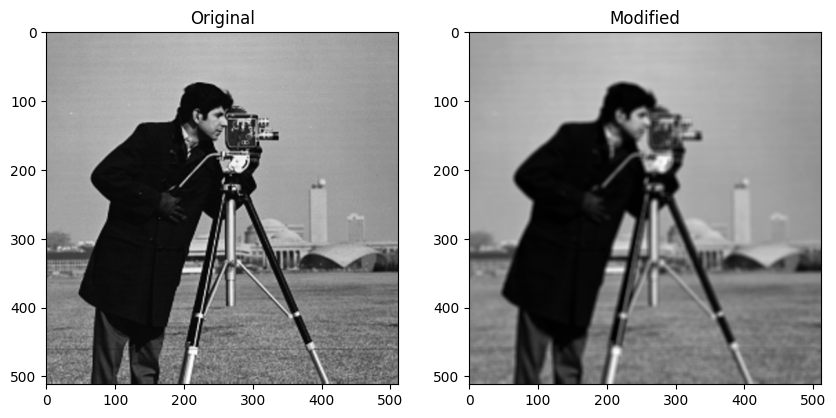

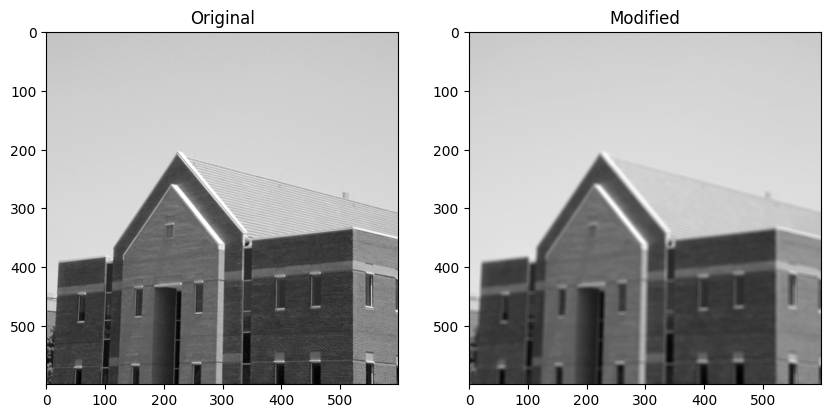

In [46]:
def mean_pillow(img) -> np.ndarray:
    return img.filter(ImageFilter.BoxBlur(kernel))

for_each_imgs(mean_pillow)

## Usando opencv

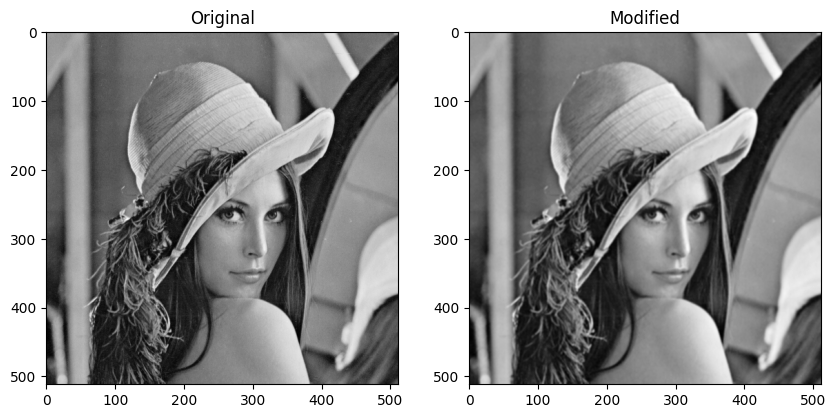

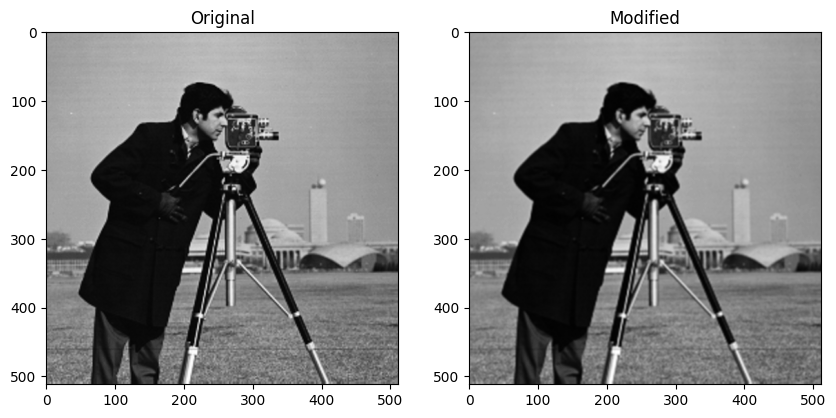

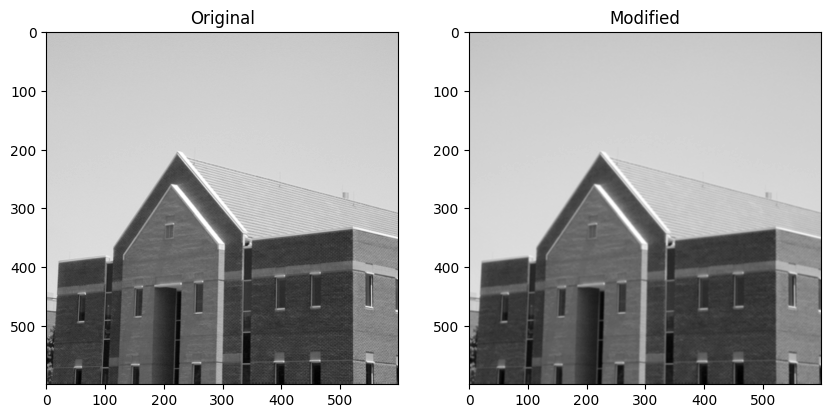

In [47]:
import cv2

def mean_opencv(img) -> np.ndarray:
    img_nd = np.array(img)
    return cv2.blur(img_nd, (kernel, kernel))

for_each_imgs(mean_opencv)

## Usando scipy

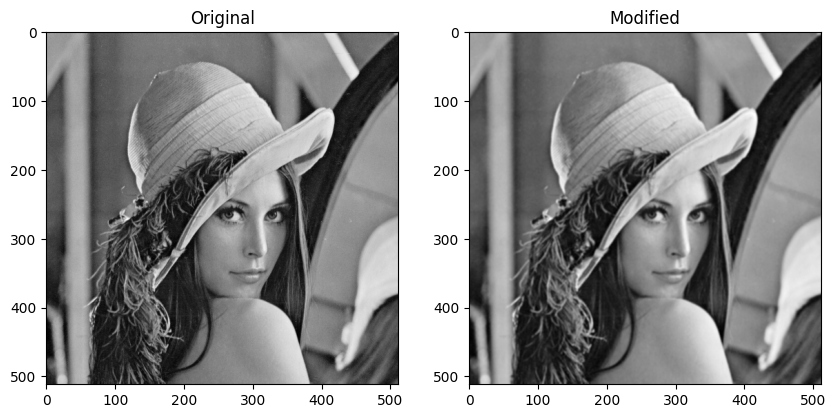

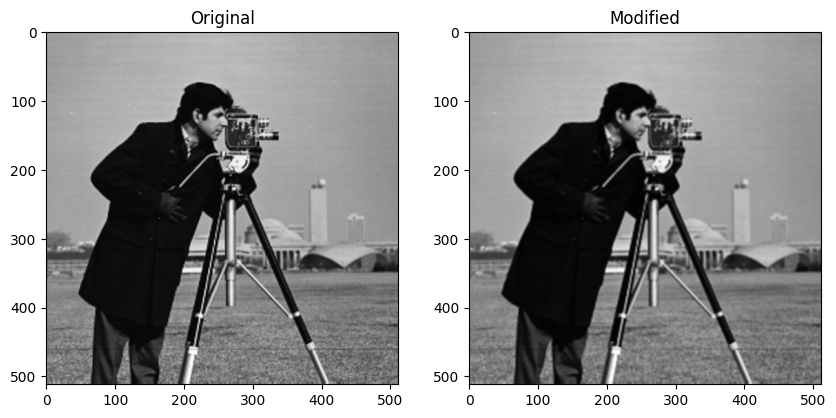

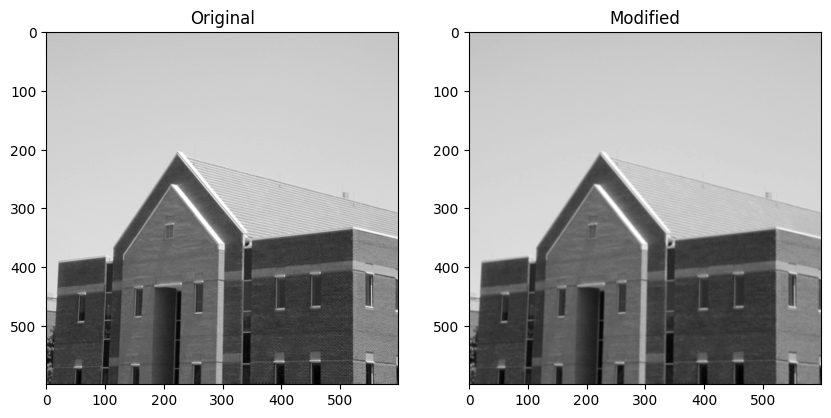

In [48]:
from scipy.ndimage import uniform_filter

def mean_scipy(img) -> np.ndarray:
    img_nd = np.array(img)
    return uniform_filter(img_nd, size=kernel)

for_each_imgs(mean_scipy)

# 2.1. Calcular o filtro da mediana

## Usando numpy

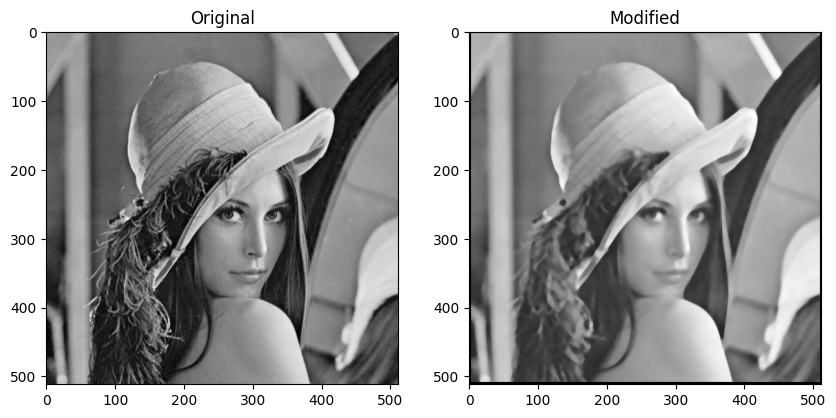

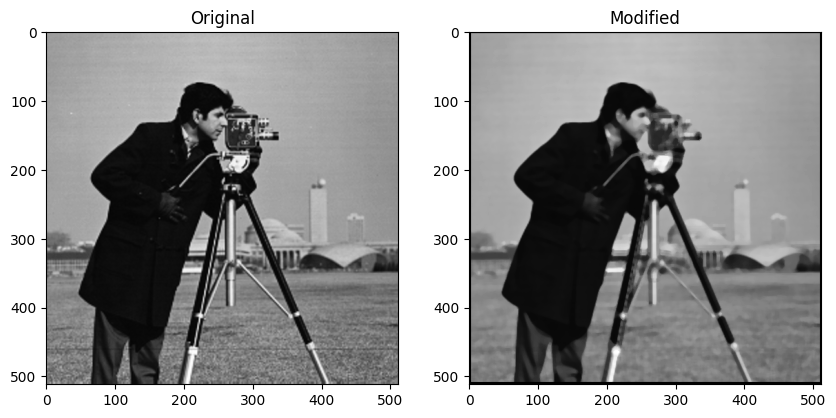

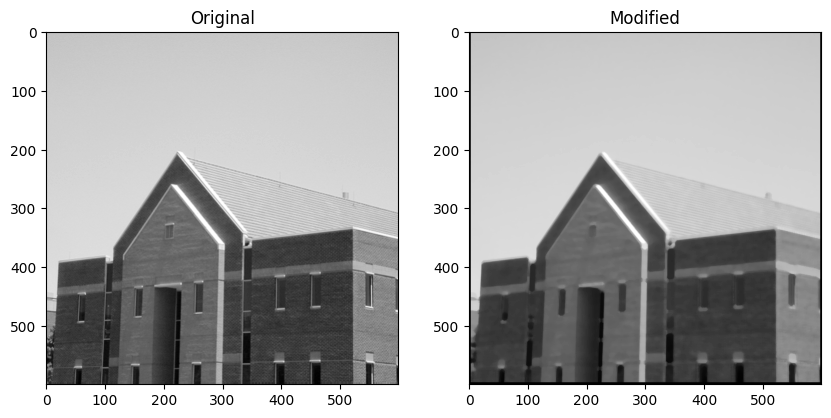

In [49]:
def median_numpy(img) -> np.ndarray:
    img_nd = np.array(img)
    lines = img_nd.shape[0]
    columns = img_nd.shape[1]

    image_nd = np.zeros((lines, columns), dtype=np.uint8)

    for x in range(kernel, lines - kernel):
        for y in range(kernel, columns - kernel):
            s_xy = img_nd[x - kernel: x + kernel + 1, y - kernel: y + kernel + 1]

            # get median
            median = np.median(s_xy).astype(int)

            # assign median to output image
            image_nd[x, y] = median

    return image_nd

for_each_imgs(median_numpy)

## Usando pillow

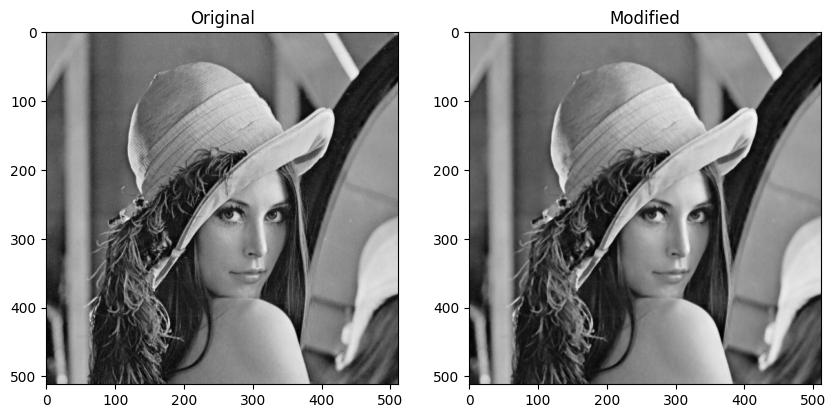

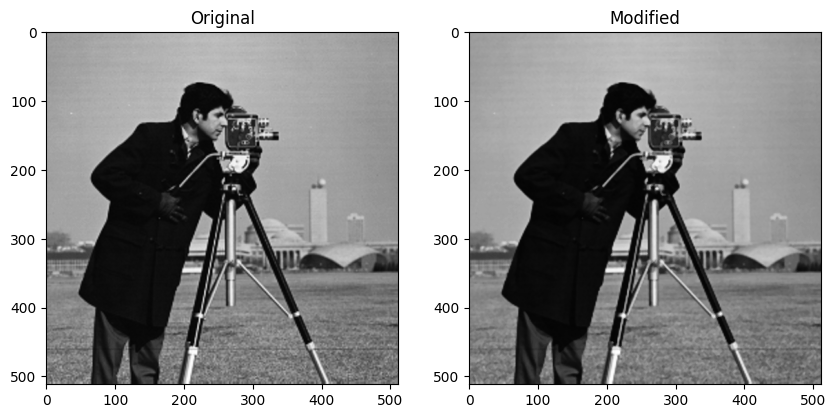

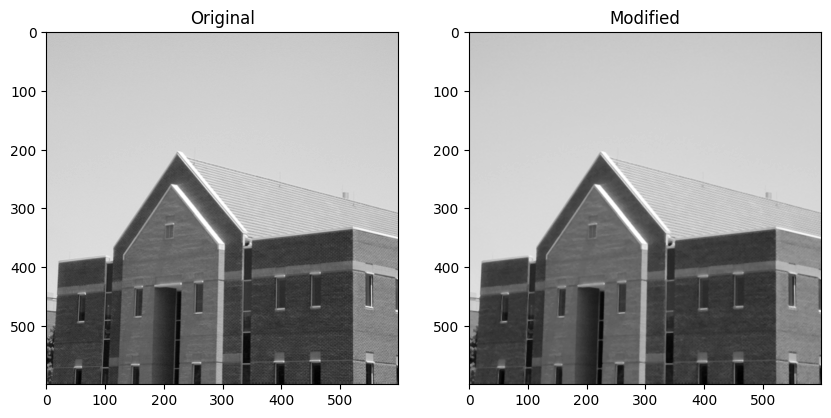

In [50]:
def median_pillow(img) -> np.ndarray:
    return img.filter(ImageFilter.MedianFilter(kernel))

for_each_imgs(median_pillow)

## Usando opencv

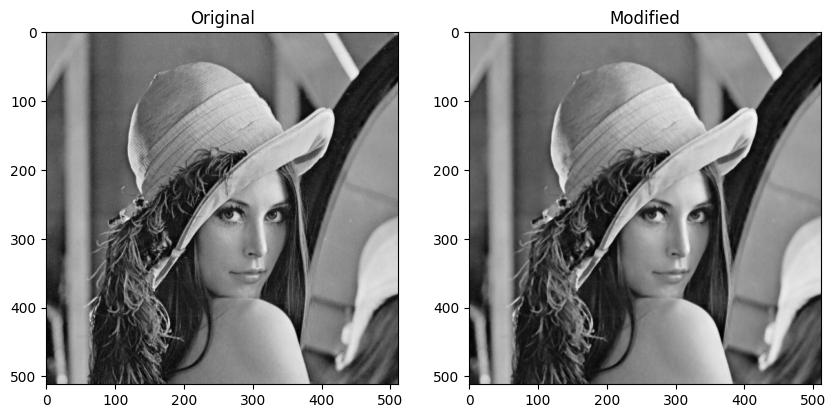

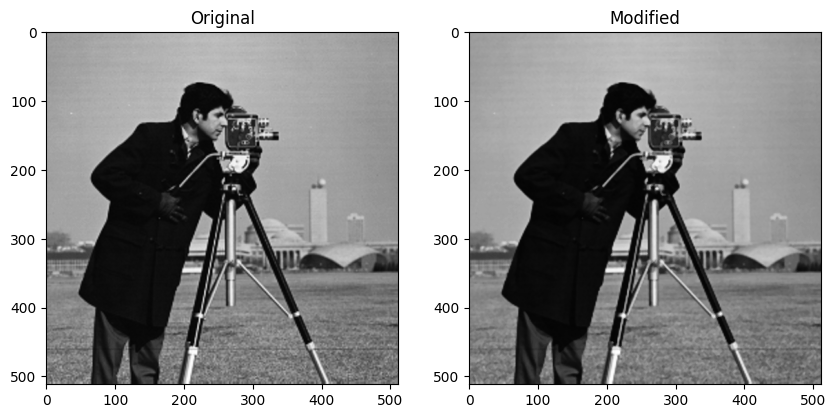

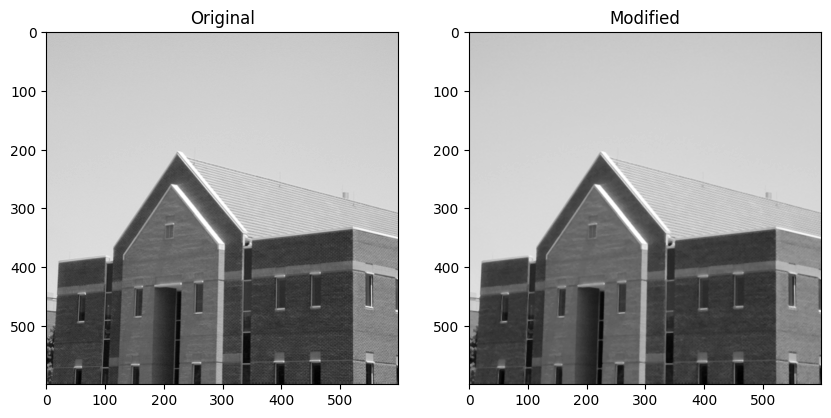

In [51]:
def median_opencv(img) -> np.ndarray:
    img_nd = np.array(img)
    return cv2.medianBlur(img_nd, kernel)

for_each_imgs(median_opencv)

## Usando scipy

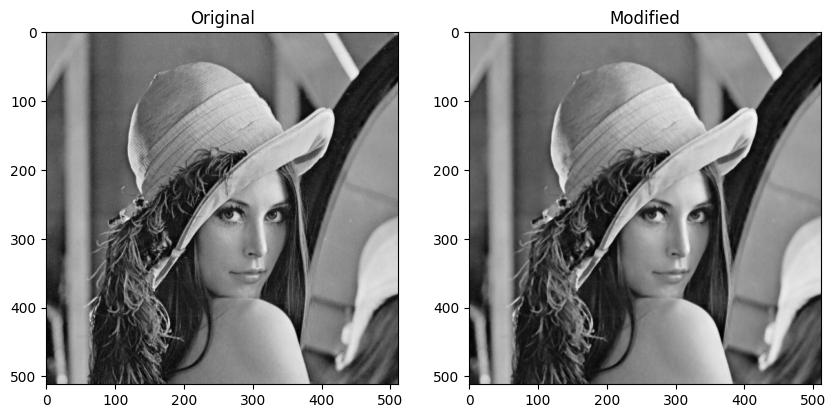

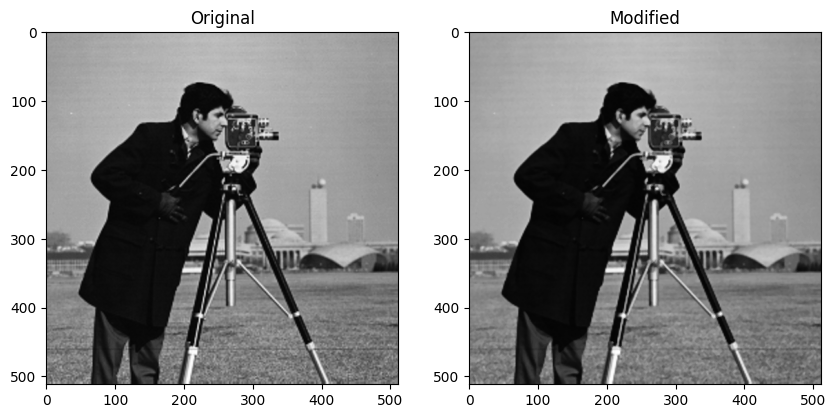

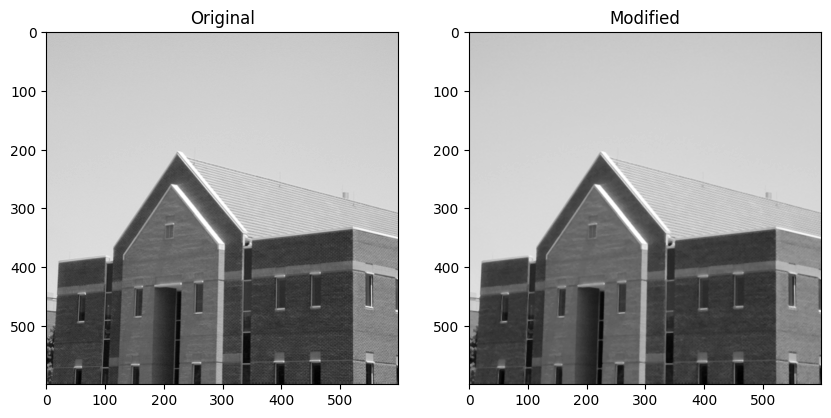

In [52]:
from scipy.ndimage import median_filter

def median_scipy(img) -> np.ndarray:
    img_nd = np.array(img)
    return median_filter(img_nd, size=kernel)

for_each_imgs(median_scipy)